<a href="https://colab.research.google.com/github/anaconda121/Deep-Learning/blob/main/Tensorflow/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author:** Tanish Tyagi C Format

## Imports

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.7.0


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import numpy as np 

## Loading Data

In [3]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


## EDA

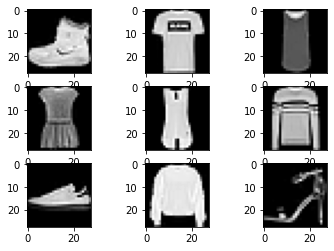

In [5]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

## Define Model

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Softmax() # is this fine?
])

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Cross Validation Loop and Model Training

In [8]:
def cross_val(x, y, n_folds=5):
  scores, histories = list(), list()
  # prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  counter = 0

  for train_ix, test_ix in kfold.split(x):
    # select rows for train and test
    x_train, y_train, x_test, y_test = x[train_ix], y[train_ix], x[test_ix], y[test_ix]
    # fit model
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=2)
    # evaluate model
    _, acc = model.evaluate(x_test, y_test, verbose=2)
    print('\n------------------------------Fold #{counter} Validation Acc {acc}------------------------------\n'.format(counter = counter + 1, acc = acc * 100.0))
    # append scores
    scores.append(acc)
    histories.append(history)
    counter += 1

  return scores, histories

In [9]:
scores, histories = cross_val(x_train, y_train)

Epoch 1/5
1500/1500 - 4s - loss: 0.5193 - accuracy: 0.8143 - val_loss: 0.4133 - val_accuracy: 0.8508 - 4s/epoch - 3ms/step
Epoch 2/5
1500/1500 - 4s - loss: 0.3805 - accuracy: 0.8606 - val_loss: 0.3602 - val_accuracy: 0.8687 - 4s/epoch - 2ms/step
Epoch 3/5
1500/1500 - 4s - loss: 0.3440 - accuracy: 0.8717 - val_loss: 0.3339 - val_accuracy: 0.8770 - 4s/epoch - 3ms/step
Epoch 4/5
1500/1500 - 3s - loss: 0.3206 - accuracy: 0.8813 - val_loss: 0.3447 - val_accuracy: 0.8738 - 3s/epoch - 2ms/step
Epoch 5/5
1500/1500 - 3s - loss: 0.3002 - accuracy: 0.8886 - val_loss: 0.3351 - val_accuracy: 0.8780 - 3s/epoch - 2ms/step
375/375 - 0s - loss: 0.3351 - accuracy: 0.8780 - 449ms/epoch - 1ms/step

------------------------------Fold #1 Validation Acc 87.8000020980835------------------------------

Epoch 1/5
1500/1500 - 4s - loss: 0.2967 - accuracy: 0.8902 - val_loss: 0.2716 - val_accuracy: 0.8962 - 4s/epoch - 2ms/step
Epoch 2/5
1500/1500 - 4s - loss: 0.2818 - accuracy: 0.8951 - val_loss: 0.2641 - val_accu

In [10]:
test = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.3727 - accuracy: 0.8897 - 659ms/epoch - 2ms/step


## Metrics

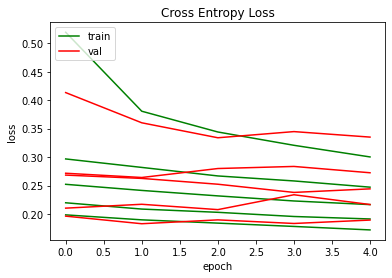

In [11]:
for i in range(len(histories)):
  # plot loss
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='green', label='train')
  plt.plot(histories[i].history['val_loss'], color='red', label='val')
  plt.legend(['train', 'val'], loc='upper left')
  plt.xlabel('epoch')
  plt.ylabel('loss')
plt.show()

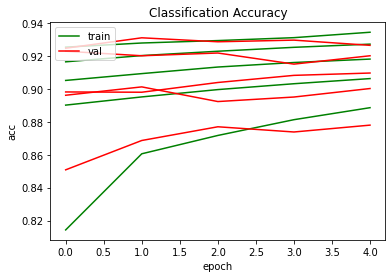

In [12]:
for i in range(len(histories)):
  # plot accuracy
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='green', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='red', label='val')
  plt.legend(['train', 'val'], loc='upper left')
  plt.xlabel('epoch')
  plt.ylabel('acc')
plt.show()

## Analyzing Model Predictions

In [13]:
def plot_img(i, pred, ground_truth, img):
  pred, ground_truth, img = pred[i], ground_truth[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred)
  if predicted_label == ground_truth:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(pred),
                                class_names[ground_truth]),
                                color=color)

In [14]:
def plot_probas(i, pred, ground_truth):
    pred, ground_truth = pred[i], ground_truth[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plot= plt.bar(range(10), pred, color="black")
    plt.ylim([0,1])
    predicted_label = np.argmax(pred)
    
    plot[predicted_label].set_color('red')
    plot[ground_truth].set_color('blue')

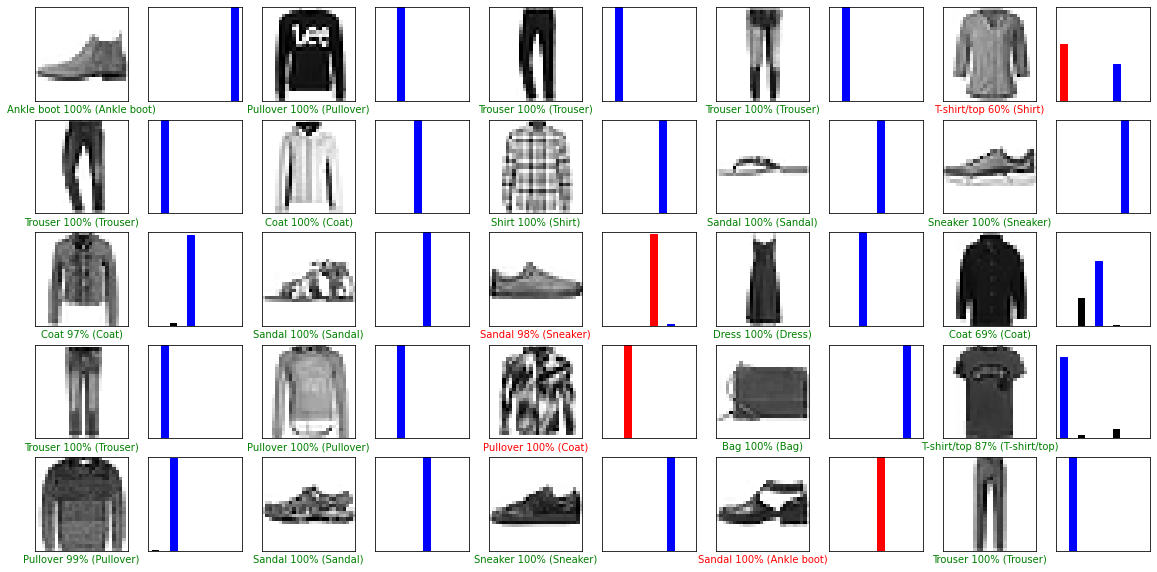

In [15]:
predictions = model.predict(x_test)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions on test set, DNN")

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_img(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_probas(i, predictions, y_test)

## Analysis Questions

**Outcomes from adjusting number of training epochs:**

Results on held-out test set are below:

1 epoch - 0.8695 ACC 

5 epochs - 0.8893 ACC

25 epochs - 0.8854 ACC 

These results make sense, as have too few epochs can result in the model underfitting, whereas too many epochs can lead to a model that overfits on the training data. We see this in our model, as the best accuracy on the validation set for the model trained on 5 epochs was 
0.927, but for the best accuracy on the validation set for the model trained on 25 epochs was 0.957, suggesting that the model trained on 25 epochs overfit. Generalizable models will have a validation accuracy similar to that of their test accuracy. This suggests that the optimal number of training epochs is between 5 and 10. 

**Difficulty I encountered**

When I was setting the loss function to ``sparse_categorical_crossentropy``, I first did ``loss = 'sparse_categorical_crossentropy'``, however, that resulted in my model achieving an accuracy of 0.30, which didn't make any sense to me. To fix this issue, I looked up the tensorflow documentation for loss functions and I saw that tensorflow assumes a probability distribution. This made me realize that I needed to add a softmax layer after the output layer in my model. After adding this, the model results were much better. 